In [ ]:
#Project 1 :: zomato Data Analysis using python
#----------------------------------------------
#Req Analysis 1 : Do more restaurants provide online delivery compared to offline services?
#Req Analysis 2 : Which types of restaurants are most favored by the general public?
#Req Analysis 3 : What price range do couples prefer for dining out?
#created by :: Muthu

In [16]:
#importing the DS from github repo 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#url = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/Zomato_data.csv?raw=true'
#zomatodf = pd.read_csv(url)

zomatodf = pd.read_csv(r'C:\Users\muthu\OneDrive\Documents\GitHub\DataAnalyst-Python\DataFiles\Zomato_data.csv')
zomatodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [17]:
#check if any nans value found 
is_zomato_null = zomatodf.isnull().values.any()

In [18]:
#check the sample data 
zomatodf.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<Axes: ylabel='count'>

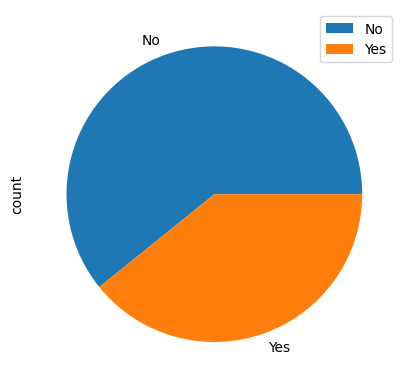

In [19]:
#Req Analysis 1 :: Do more restaurants provide online delivery compared to offline services?
#plot using the matplotlib 

zomatodf['online_order'].value_counts().plot(kind="pie",legend=True)




<Axes: xlabel='online_order', ylabel='count'>

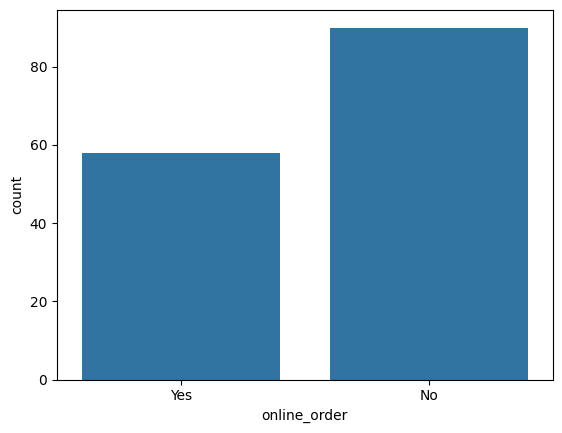

In [20]:
#plot the online order - Yes or no using seaborn

sns.countplot(x=zomatodf['online_order'])

In [21]:
#Req Analysis 2 : Which types of restaurants are most favored by the general public?

#validating the unique values to plot the graph
zomatodf['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

<Axes: xlabel='listed_in(type)'>

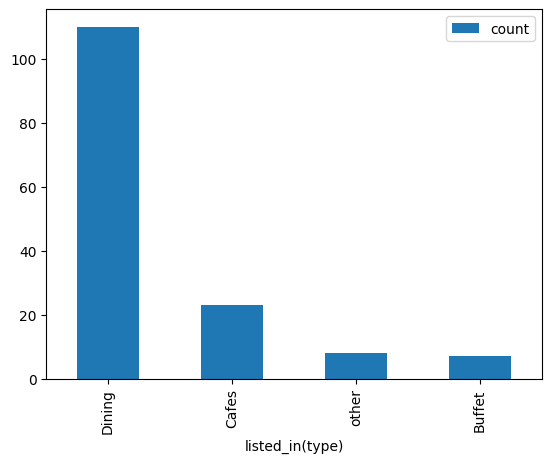

In [22]:
#plot the bar graph using matplotlib

zomatodf['listed_in(type)'].value_counts().plot(kind="bar",legend=True)

Text(0.5, 0, 'Type Of Restaurant')

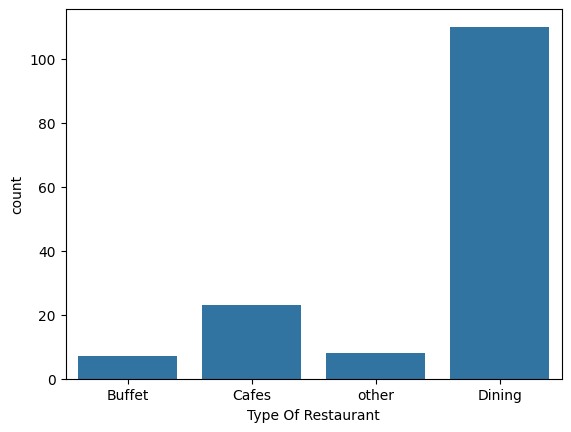

In [23]:
#plotting the same requirement using the seaborn

sns.countplot(x=zomatodf['listed_in(type)'])
plt.xlabel('Type Of Restaurant')